# Perkenalan

- Aldo Dwicahyo
- Batch 004

# Import Pustaka

In [1]:
#dataframe and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn Lib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

#tensorflow for ANN
import tensorflow as tf
from tensorflow import keras


import warnings
warnings.filterwarnings('ignore')


# Data Loading

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Clenaing

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari info diatas, kolom `TotalCharges` adalah berbentuk angka jika ditampilkan pada pandas dataframe, dan memiliki `Missing Values`. namun pada info kolom terkait adalah object. maka harus dilakukan perubahan dtype pada kolom ini

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

Dari penglihatan data seacara singkat diatas, dapat ditarik kesimpulan bahwa tidak ada missing values yang berbentuk `nan`, namun bisa saja terjadi missing values yang tetap diinput dengan data yang lain. oleh karena itu saya akan melakukan EDA pada setiap kolom

In [7]:
null = df[df['TotalCharges'].isnull()] #mencari data null values pada Kolom TotalCharges

null[['MonthlyCharges', 'TotalCharges']] #mengindentifikasi MissingValues berjenis apa

,MonthlyCharges,TotalCharges
488,52.55,NaN
753,20.25,NaN
936,80.85,NaN
1082,25.75,NaN
1340,56.05,NaN
3331,19.85,NaN
3826,25.35,NaN
4380,20.00,NaN
5218,19.70,NaN
6670,73.35,NaN


Dari data diatas dapat diketahui bahwa kolom TotalCharges yang bernilai `NaN` adalah jenis `Missing Completely at Random`. Dan dengan mempertimbangkan jumlah dari missing values, saya akan menghapus data yang missing saja.

In [8]:
df = df.dropna(subset=['TotalCharges'])
df = df.reset_index()
df = df.drop(['index'], axis=1)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

## Label Distribution

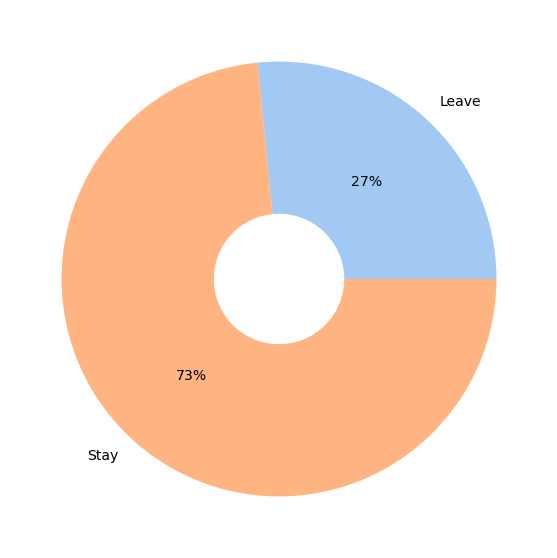

In [9]:
plt.figure(figsize=(10,10))

d1 = df[df["Churn"]=='Yes']
d2 = df[df["Churn"]=='No']

label1 = ["Leave","Stay"]
values1 = [len(d1), len(d2)]

colors = sns.color_palette('pastel')[0:5]

plt.pie(values1, labels = label1, colors = colors, autopct='%.0f%%', wedgeprops=dict(width=.7),textprops={'fontsize': 14})
plt.xlabel
plt.show()

Distribusi dari Label tidak baik, yang harus dilakukan adalah balancing data. untuk pemilihan cara balancing data akan ditentukan saat data preprocessing

## Gender

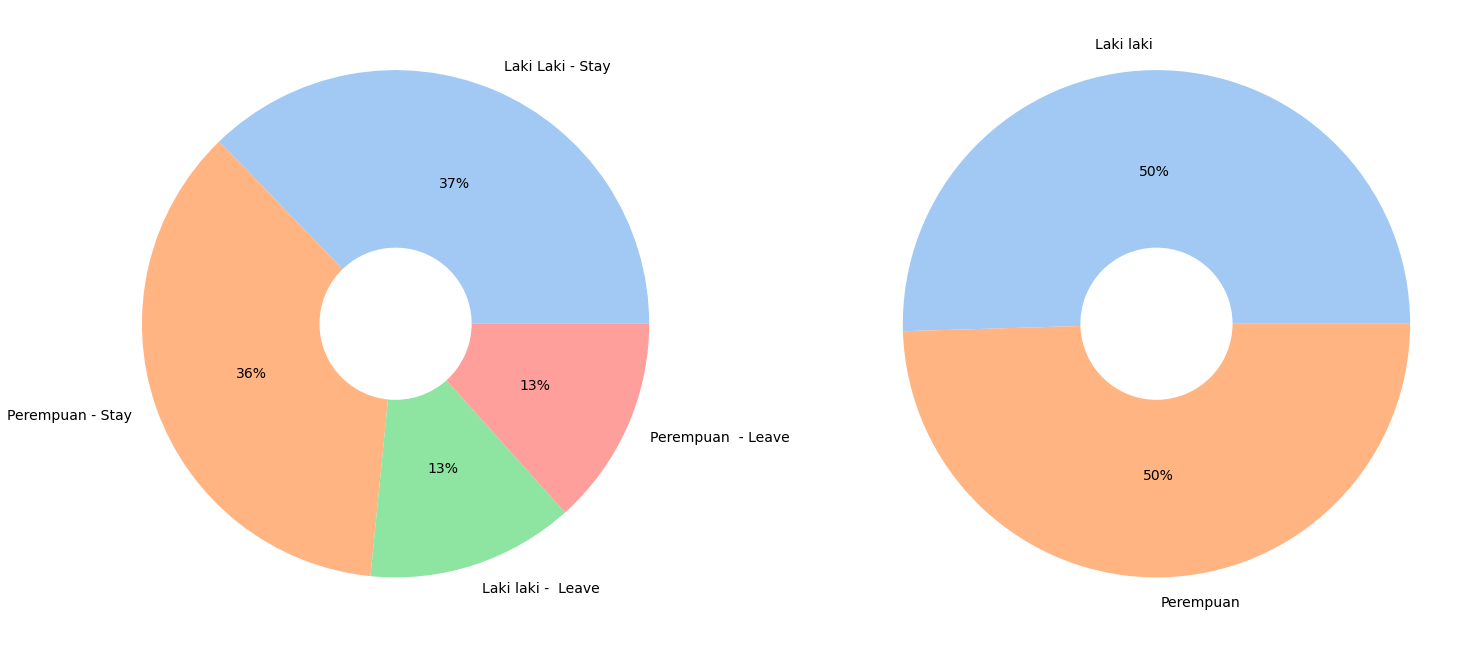

In [10]:
plt.figure(figsize=(25,15))

d1 = df[(df["gender"]=='Male') & (df["Churn"]=='No')]
d2 = df[(df["gender"]=='Female') & (df["Churn"]=='No')]
d3 = df[(df["gender"]=='Male') & (df["Churn"]=='Yes')]
d4 = df[(df["gender"]=='Female') & (df["Churn"]=='Yes')]

label1 = ["Laki laki","Perempuan"]
label2 = ['Laki Laki - Stay','Perempuan - Stay', "Laki laki -  Leave", "Perempuan  - Leave"]
label3 = ['Puas', 'Tidak Puas']
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]
values3 = [(len(d1)+len(d2)), (len(d3)+len(d4))]

colors = sns.color_palette('pastel')[0:5]

plt.subplot(121)
plt.pie(values2, labels = label2, colors = colors, autopct='%.0f%%', wedgeprops=dict(width=.7),textprops={'fontsize': 14})
plt.xlabel
plt.subplot(122)
plt.pie(values1, labels = label1, colors = colors, autopct='%.0f%%', wedgeprops=dict(width=0.7), textprops={'fontsize': 14})
plt.xlabel

plt.show()

Jika distribusi dilihat kolom gender, semua data terdistribusi secara baik yang dapat dilihat dari :
- Dari total gender menghasilkan nilai imbang yaitu 50 : 50
- Jika dikaitkan dengan label/target, data juga terdistribusi secara baik. yang berkemungkinan bahwa data gender tidak akan dipilih untuk menjadi feature pada saat pendefinisian model

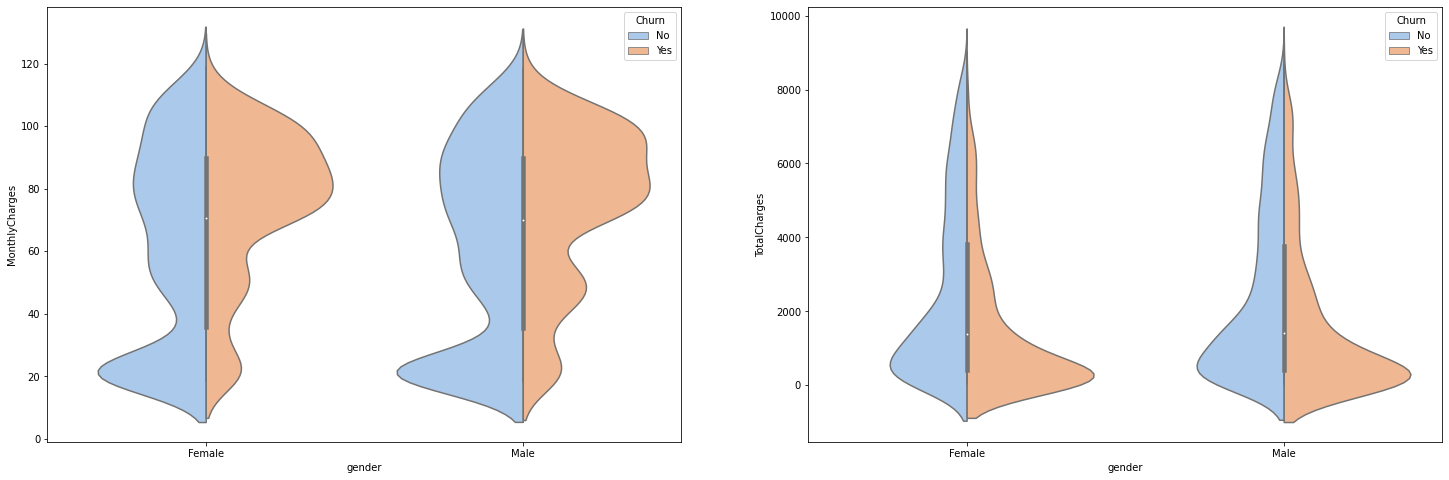

In [11]:
plt.figure(figsize=(25,8))

colors = sns.color_palette('pastel')

plt.subplot(121)
sns.violinplot(data=df, x='gender', y='MonthlyCharges', hue='Churn', palette=colors, split=True)

plt.subplot(122)
sns.violinplot(data=df, x='gender', y='TotalCharges', hue='Churn', palette=colors, split=True)

plt.show()

Dari hasil visualisasi grafik diatas, dapat diambil kesimpulan bahwa :
- Dari grafik violin diatas yang mengaitkan `gender` dengan `MontlyCharges` dan `TotalCharges`. Terlihat gender tidak berpengaruh terhadap pemakaian service.
- Untuk Churn rate pada gender dan monthlycharges dapat diambil kesimpulan  bahwa semakin tinggi Montlycharges dari setiap gender, akan menghasilkan Churnrate yang tinggi juga. namun berkebalikan dengan TotalCharges, semakin rendah TotalCharges maka semakin tinggi Churn rate.

## Senior Citizen

Dari deskripsi di kaggle, senior citizen adalah pemilik akun yang memiliki umur yang cukup tua.

Dari sumber data, tidak diberitahu berapa threshold dari umur ini, yang akan dilakukan adalah melihat distribusi dari kolom ini dan kaitannya dengan target

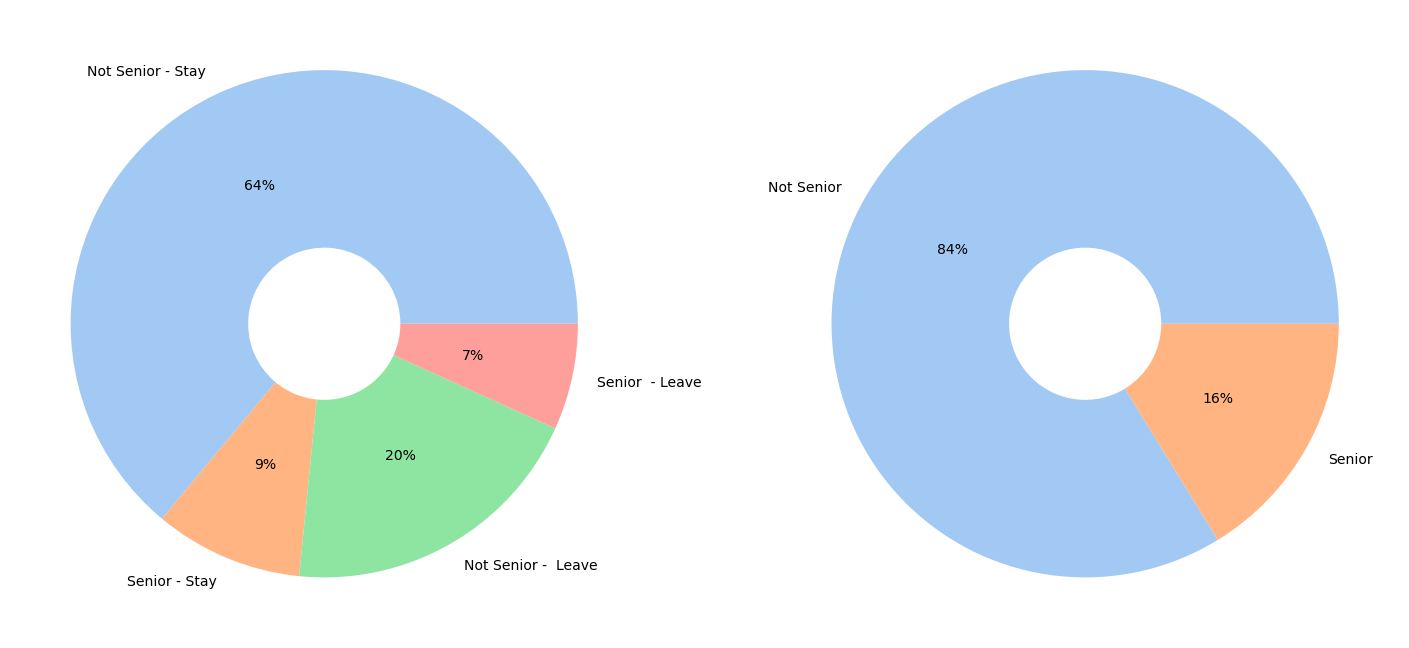

In [12]:
plt.figure(figsize=(25,15))

d1 = df[(df["SeniorCitizen"]==0) & (df["Churn"]=='No')]
d2 = df[(df["SeniorCitizen"]==1) & (df["Churn"]=='No')]
d3 = df[(df["SeniorCitizen"]==0) & (df["Churn"]=='Yes')]
d4 = df[(df["SeniorCitizen"]==1) & (df["Churn"]=='Yes')]

label1 = ["Not Senior","Senior"]
label2 = ['Not Senior - Stay','Senior - Stay', "Not Senior -  Leave", "Senior  - Leave"]
label3 = ['Puas', 'Tidak Puas']
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]
values3 = [(len(d1)+len(d2)), (len(d3)+len(d4))]

colors = sns.color_palette('pastel')[0:5]

plt.subplot(121)
plt.pie(values2, labels = label2, colors = colors, autopct='%.0f%%', wedgeprops=dict(width=.7),textprops={'fontsize': 14})
plt.xlabel
plt.subplot(122)
plt.pie(values1, labels = label1, colors = colors, autopct='%.0f%%', wedgeprops=dict(width=0.7), textprops={'fontsize': 14})
plt.xlabel

plt.show()

Dari data diatas, dapat diambil kesimpulan bahwa jelas total data terdapat pada `Not Senior`, namun ini bisa saja menjadi feature untuk membuat model ANN karena sangat tinggi sekali nilai `Not Senior` yang stay.

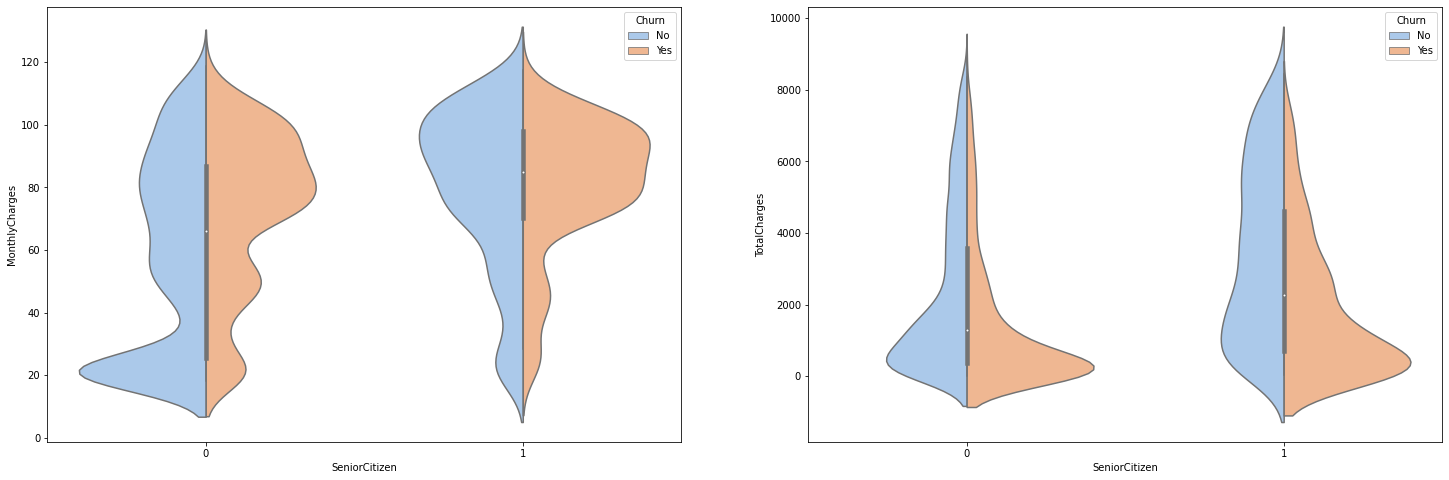

In [13]:
plt.figure(figsize=(25,8))

colors = sns.color_palette('pastel')

plt.subplot(121)
sns.violinplot(data=df, x='SeniorCitizen', y='MonthlyCharges', hue='Churn', palette=colors, split=True)

plt.subplot(122)
sns.violinplot(data=df, x='SeniorCitizen', y='TotalCharges', hue='Churn', palette=colors, split=True)

plt.show()

Untuk data `SeniorCitizen` terdapat pengaruh signifikan pada `MontlyCharges` namun tidak pada `TotalCharges`. Untuk mengehathui ini mungkin dapat dilihat pada keterkaitan Senior Citizen dengan Tenure

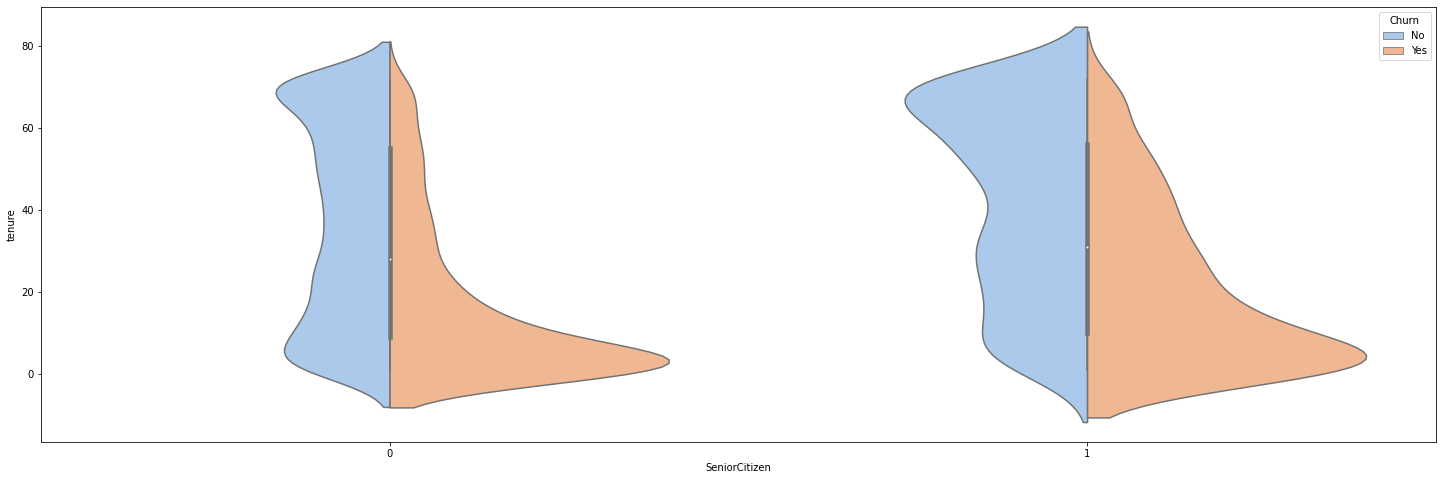

In [14]:
plt.figure(figsize=(25,8))

colors = sns.color_palette('pastel')

sns.violinplot(data=df, x='SeniorCitizen', y='tenure', hue='Churn', palette=colors, split=True)

plt.show()

Dari visualisasi data diatas, dapat diambil kesimpulan sebagai berikut :
- Semakin rendah Tenure ternyata seamkin tinggi juga angka user akan Churn dari service perusahaan, dan ini terjadi disemua kalangan umur.
- Pada awalnya saya melogikakan bahwan semakin tinggi tenure dari 1 user, maka akan semakin rendah monthly expensesnya, ternyata setelah dilakukan ploting menggunakan violin graph tidak ada perbedaan yang signifikan antara seniorcitizen dan yang tidak
- maka untuk mengecheck mengapa SeniorCitizen memiliki angka monthlycharges yang tinggi, akan dicoba pengecheckan pada service(s) yang digunakaan oleh seniorCitizen

## Partners

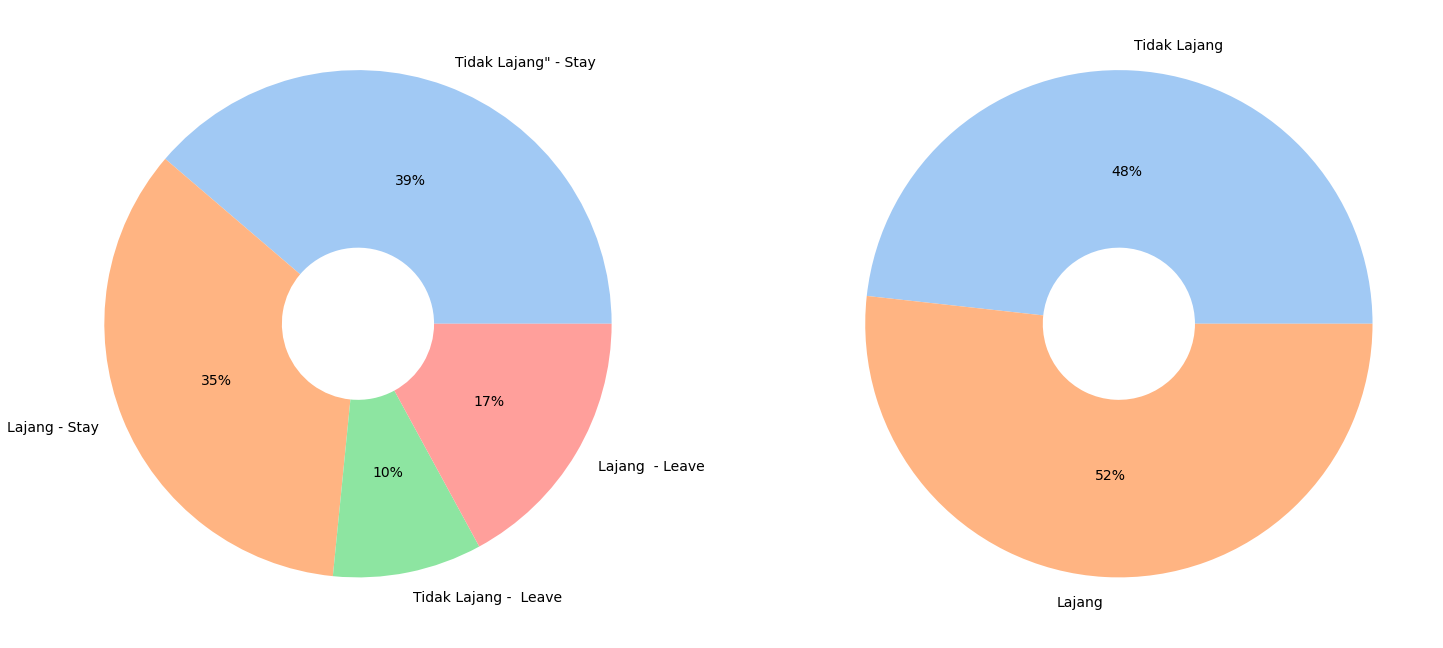

In [15]:
plt.figure(figsize=(25,15))

d1 = df[(df["Partner"]=='Yes') & (df["Churn"]=='No')]
d2 = df[(df["Partner"]=='No') & (df["Churn"]=='No')]
d3 = df[(df["Partner"]=='Yes') & (df["Churn"]=='Yes')]
d4 = df[(df["Partner"]=='No') & (df["Churn"]=='Yes')]

label1 = ["Tidak Lajang","Lajang"]
label2 = ['Tidak Lajang" - Stay','Lajang - Stay', "Tidak Lajang -  Leave", "Lajang  - Leave"]
label3 = ['Puas', 'Tidak Puas']
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]
values3 = [(len(d1)+len(d2)), (len(d3)+len(d4))]

colors = sns.color_palette('pastel')[0:5]

plt.subplot(121)
plt.pie(values2, labels = label2, colors = colors, autopct='%.0f%%', wedgeprops=dict(width=.7),textprops={'fontsize': 14})
plt.xlabel
plt.subplot(122)
plt.pie(values1, labels = label1, colors = colors, autopct='%.0f%%', wedgeprops=dict(width=0.7), textprops={'fontsize': 14})
plt.xlabel

plt.show()

tidak ada yang special dari data diatas, distribusi dari kolom Partners terdsitribusi secara cukup baik. Dan jika dikaitkan dengan target, status partners yang paling banyak leave adalah yang `Lajang`.

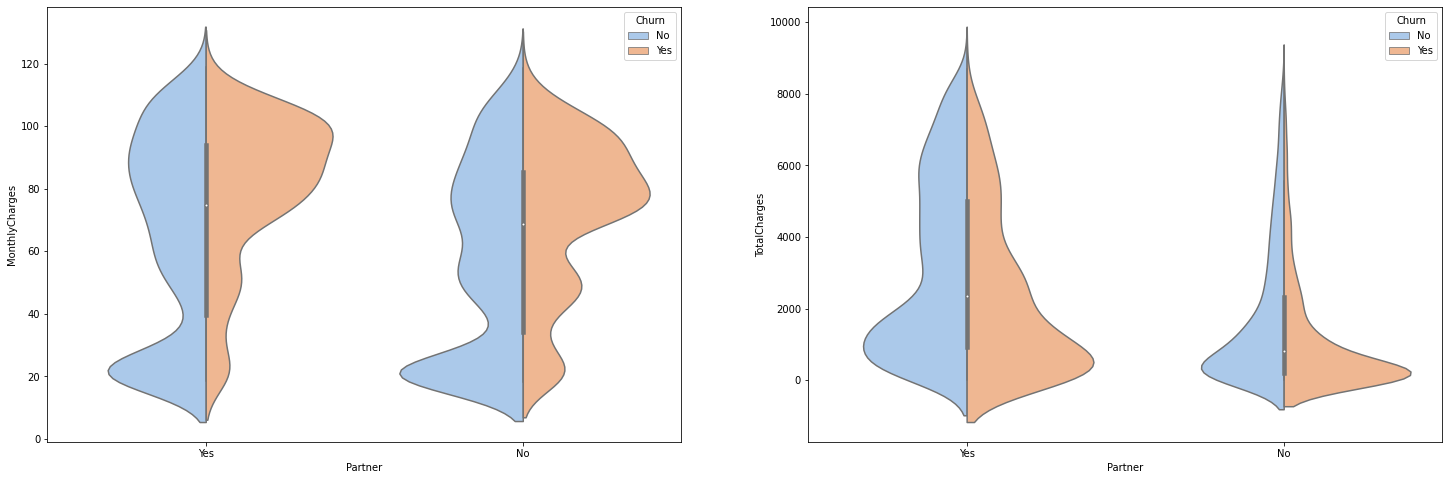

In [16]:
plt.figure(figsize=(25,8))

colors = sns.color_palette('pastel')

plt.subplot(121)
sns.violinplot(data=df, x='Partner', y='MonthlyCharges', hue='Churn', palette=colors, split=True)

plt.subplot(122)
sns.violinplot(data=df, x='Partner', y='TotalCharges', hue='Churn', palette=colors, split=True)

plt.show()

Dari visualisasi data diatas, dapat diambil kesimpulan bahwa :
- Partners tidak terlalu berpengaruh terhadap Churnrate yang dapat dilihat bahwa pada Kolom partners yes dan no churn rate tinggi jika memiliki MonthlyCharges yang tinggi pula.

## Dependents

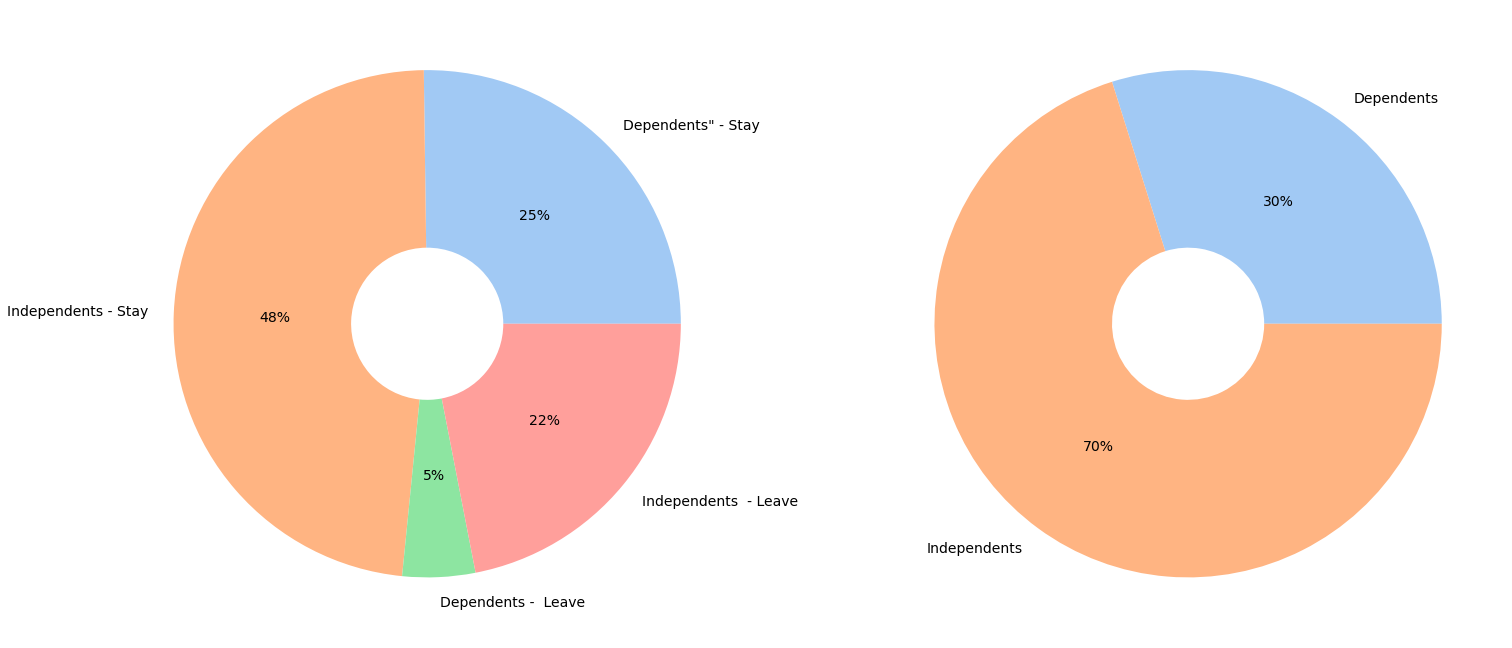

In [17]:
plt.figure(figsize=(25,15))

d1 = df[(df["Dependents"]=='Yes') & (df["Churn"]=='No')]
d2 = df[(df["Dependents"]=='No') & (df["Churn"]=='No')]
d3 = df[(df["Dependents"]=='Yes') & (df["Churn"]=='Yes')]
d4 = df[(df["Dependents"]=='No') & (df["Churn"]=='Yes')]

label1 = ["Dependents","Independents"]
label2 = ['Dependents" - Stay','Independents - Stay', "Dependents -  Leave", "Independents  - Leave"]
label3 = ['Puas', 'Tidak Puas']
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]
values3 = [(len(d1)+len(d2)), (len(d3)+len(d4))]

colors = sns.color_palette('pastel')[0:5]

plt.subplot(121)
plt.pie(values2, labels = label2, colors = colors, autopct='%.0f%%', wedgeprops=dict(width=.7),textprops={'fontsize': 14})
plt.xlabel
plt.subplot(122)
plt.pie(values1, labels = label1, colors = colors, autopct='%.0f%%', wedgeprops=dict(width=0.7), textprops={'fontsize': 14})
plt.xlabel

plt.show()

Dari distribusi data diatas, data yang independents agak sedikit mendominasi. Dan jika dikaitkan dengan target, customers yang independent sangat banyak yang Stay dibandingkan dengan yang Churn

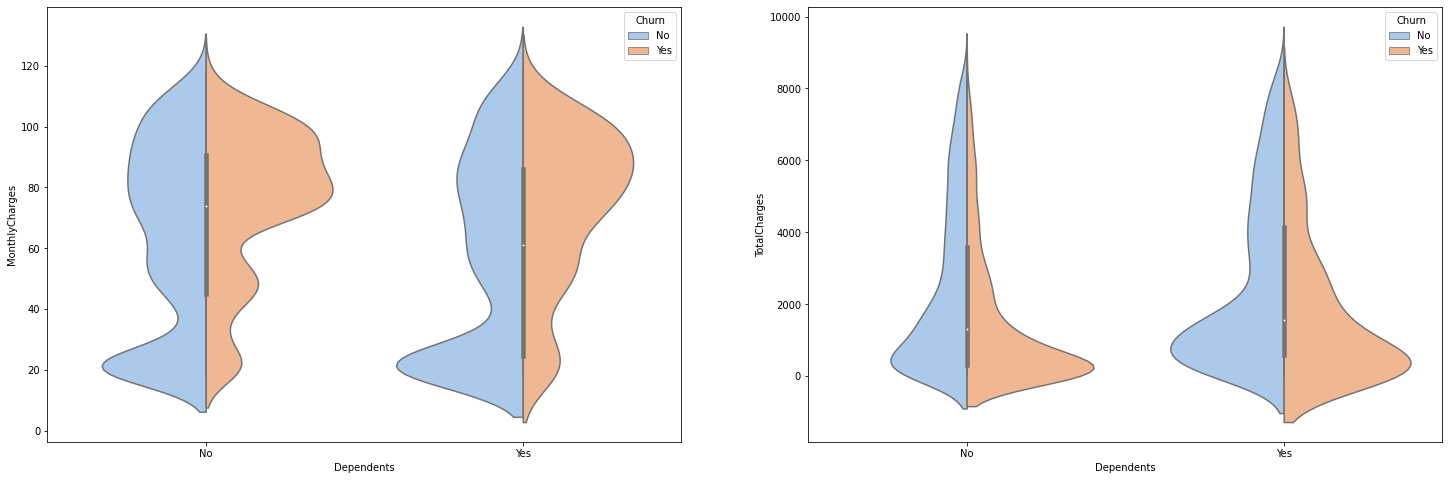

In [18]:
plt.figure(figsize=(25,8))

colors = sns.color_palette('pastel')

plt.subplot(121)
sns.violinplot(data=df, x='Dependents', y='MonthlyCharges', hue='Churn', palette=colors, split=True)

plt.subplot(122)
sns.violinplot(data=df, x='Dependents', y='TotalCharges', hue='Churn', palette=colors, split=True)

plt.show()

Dan jika dikaitkan dengan MonthlyCharges dan TotalCharges, hampir sama saja dengan data kategorikal yang lain, semakin tinggi MonthlyChargesnya semakin banyak juga orang yang Churn

## Contract

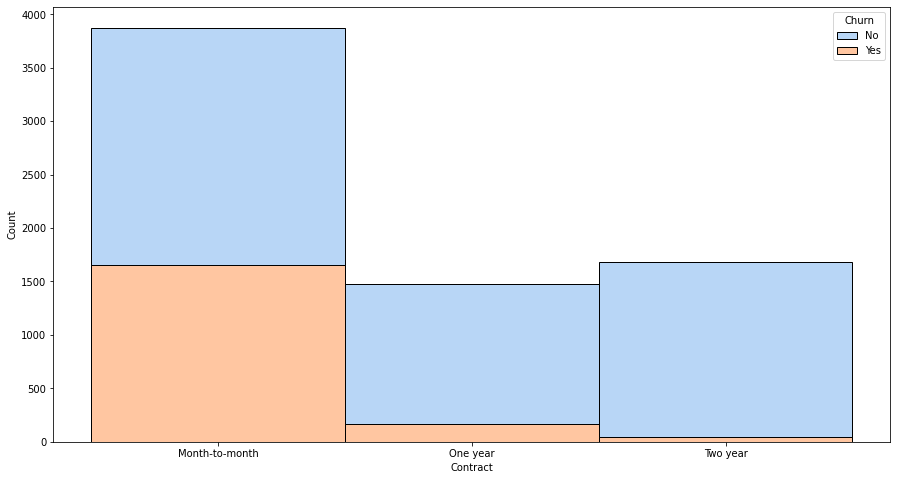

In [19]:
plt.figure(figsize=(15,8))

sns.histplot(data=df, x="Contract", hue='Churn', palette='pastel', multiple='stack')

plt.show()

Dari visualisasi menggunakan histrogram diatas, Kebanyakan customers yang melakukan Churn adalah yang memiliki contract Month-to-Month Contract

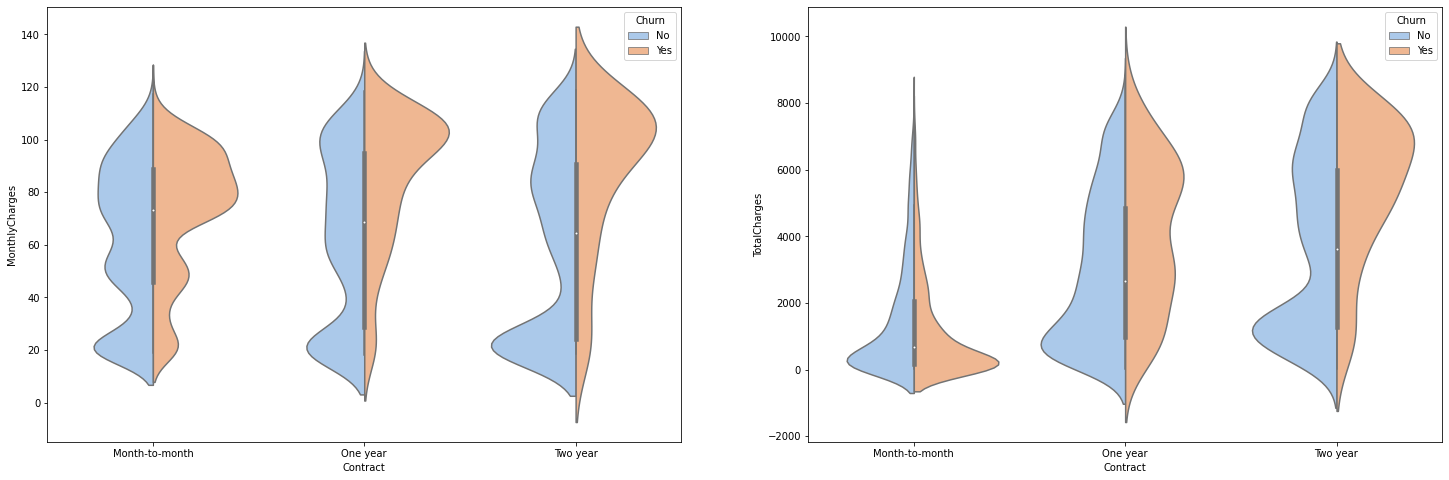

In [20]:
plt.figure(figsize=(25,8))

colors = sns.color_palette('pastel')

plt.subplot(121)
sns.violinplot(
              data=df, 
              x='Contract', 
              y='MonthlyCharges', 
              hue='Churn', 
              palette=colors, 
              split=True
)

plt.subplot(122)
sns.violinplot(
              data=df, 
              x='Contract', 
              y='TotalCharges', 
              hue='Churn', 
              palette=colors, 
              split=True
)

plt.show()

Dilihat dari tipe contract jika dibandingkan dengan MonthlyCharges, memang data dengan Churn rate tinggi terdistribusi pada MonthlyCharges yang tinggi. Namun yang menarik adalah pada grafik contract dengan TotalCharges, dari tiap-tiap contract memiliki distribusi customer yang berbeda pula.

## Tenure

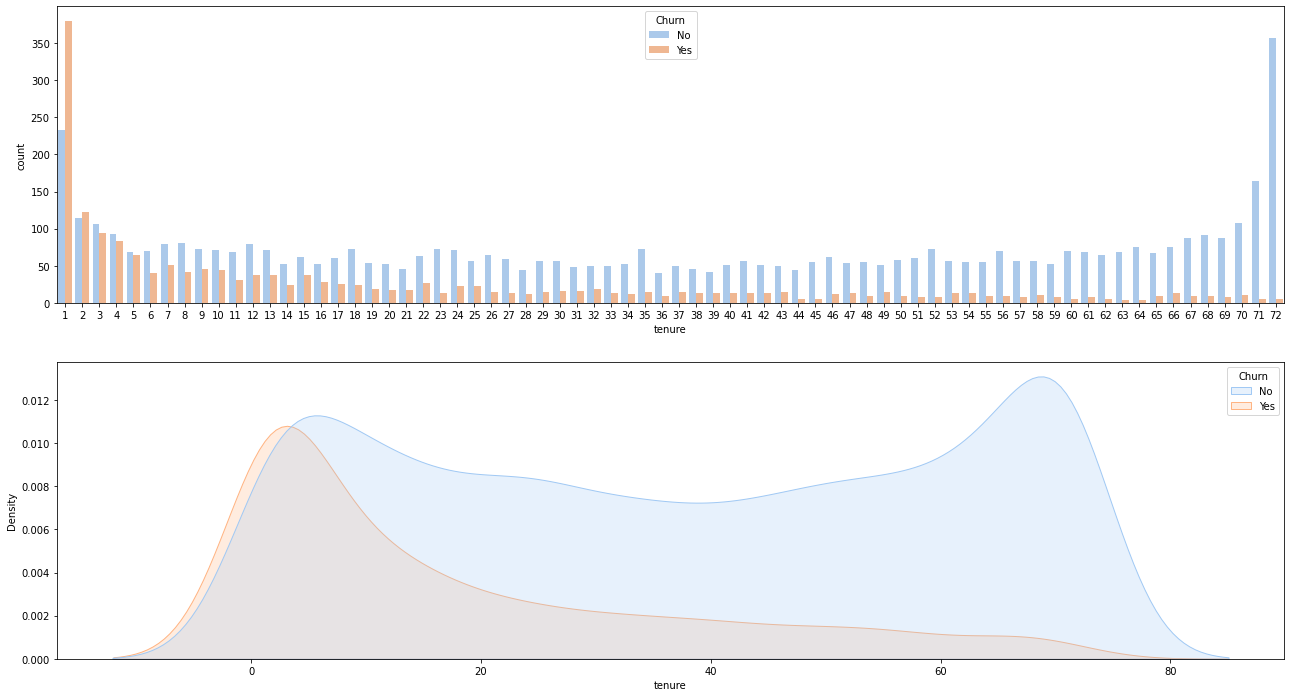

In [21]:
plt.figure(figsize=(22,12))

plt.subplot(211)
sns.countplot(data=df, x="tenure", hue='Churn', palette='pastel')

plt.subplot(212)
sns.kdeplot(data=df, x='tenure', hue='Churn', palette='pastel', shade=True)

plt.show()


Dari visualisasi data diatas, Churn rate tertinggi berada pada tenure yang terbilang sangat rrendah dan semakin menurun pada tenure yang tinggi

## Monthly Charges

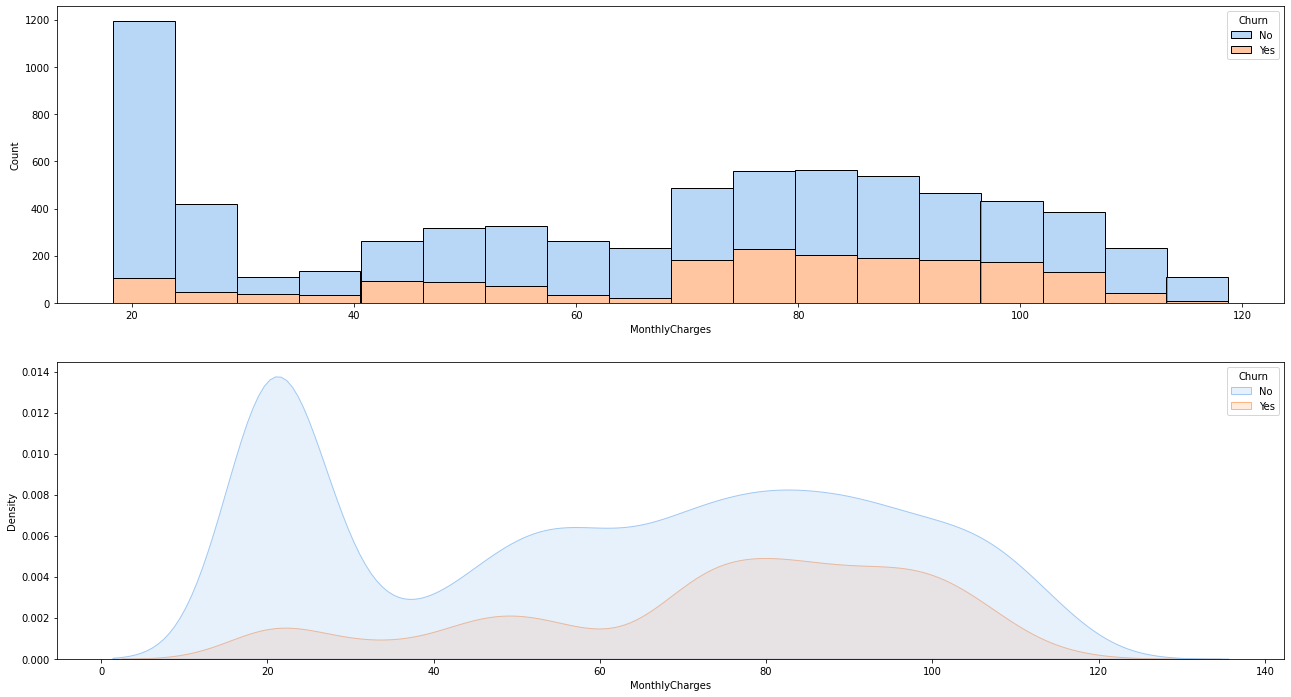

In [22]:
plt.figure(figsize=(22,12))

plt.subplot(211)
sns.histplot(data=df, x="MonthlyCharges", hue='Churn', palette='pastel', multiple='stack')

plt.subplot(212)
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', palette='pastel', shade=True)
plt.show()


Dari visualisasi data di atas, dapat disimpulkan untuk customer yang tidak churn data terdistribusi pada MonthlyCharges yang rendah, dan cenderung turun pada 

## Total Charges

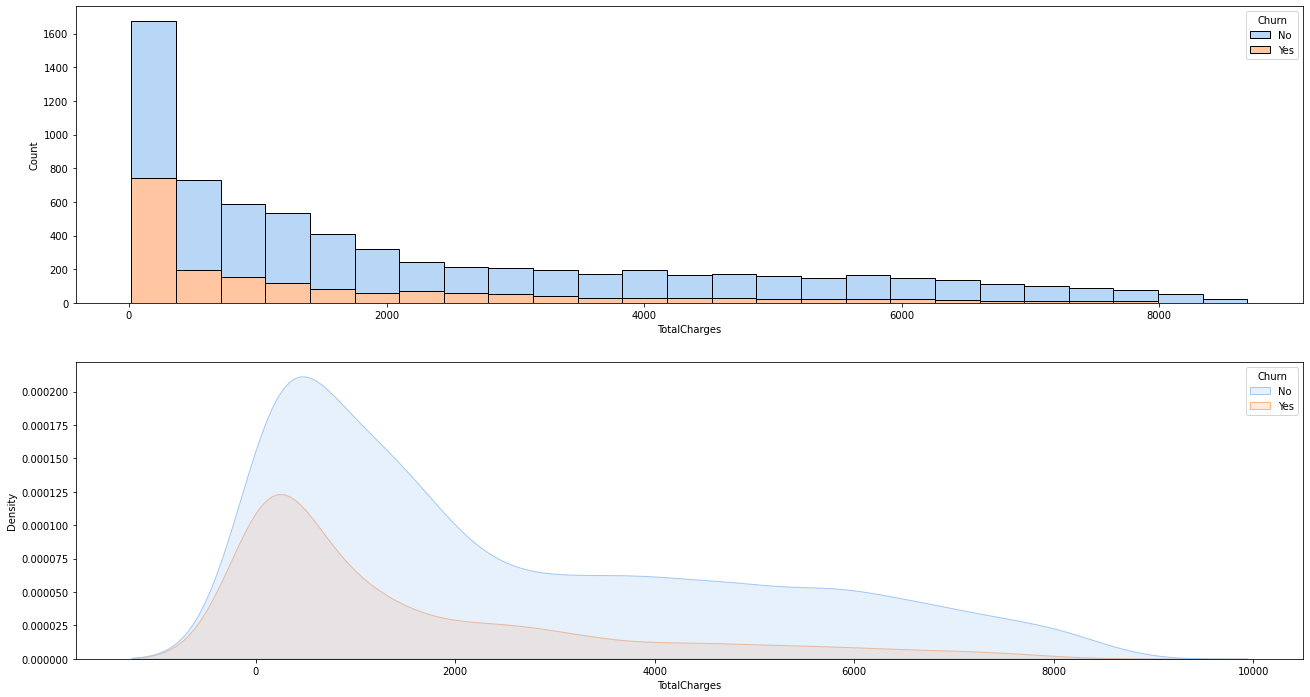

In [23]:
plt.figure(figsize=(22,12))

plt.subplot(211)
sns.histplot(data=df, x="TotalCharges", hue='Churn', palette='pastel', multiple='stack')

plt.subplot(212)
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', palette='pastel', shade=True)
plt.show()


Untuk data Total Charges, data terdistribusi sangat tinggi di sekitar 0 sampai dengan 2000.

## Services Features

In [24]:
services = [
            'PhoneService',
            'MultipleLines',
            'InternetService',
            'OnlineSecurity',
            'OnlineBackup',
            'DeviceProtection',
            'TechSupport',
            'StreamingTV',
            'StreamingMovies'
]

dfServices = df[services]

In [25]:
dfServices.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,No phone service,DSL,No,Yes,No,No,No,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,Yes,No,Fiber optic,No,No,No,No,No,No


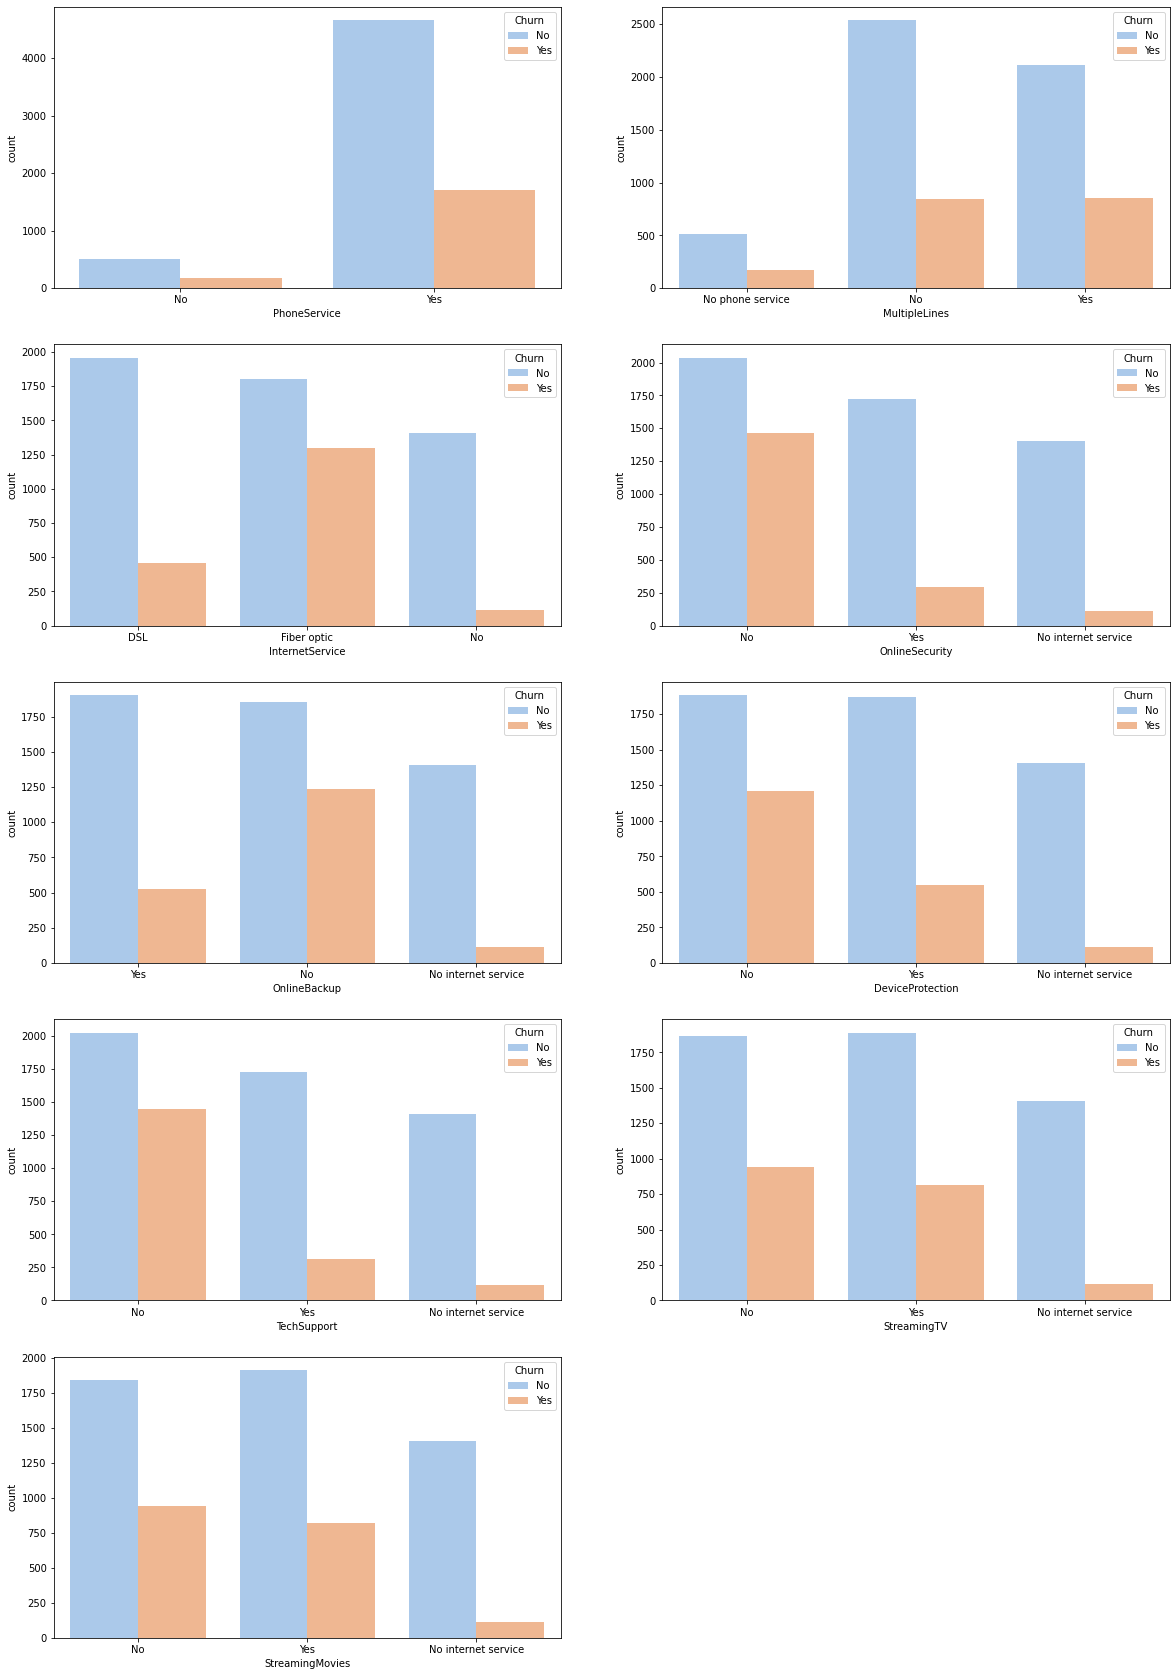

In [26]:
plt.figure(figsize=(20,30))

plotnumber = 1

for column in dfServices.columns.tolist():
    if plotnumber<=9 :
        ax = plt.subplot(5,2,plotnumber)
        sns.countplot(data=df, x=column, hue='Churn', palette = 'pastel')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Dilihat dari grafik services, banyak kolom yang mengandung `No internet service` ini sangat berpotensi membuat data terdistorsi saat pembuatan model machine learning kedepan dan ini bisa digolongkan kedalam `Missing Values`.

In [27]:
df.replace({
    'No internet service':'No'
}, inplace=True)



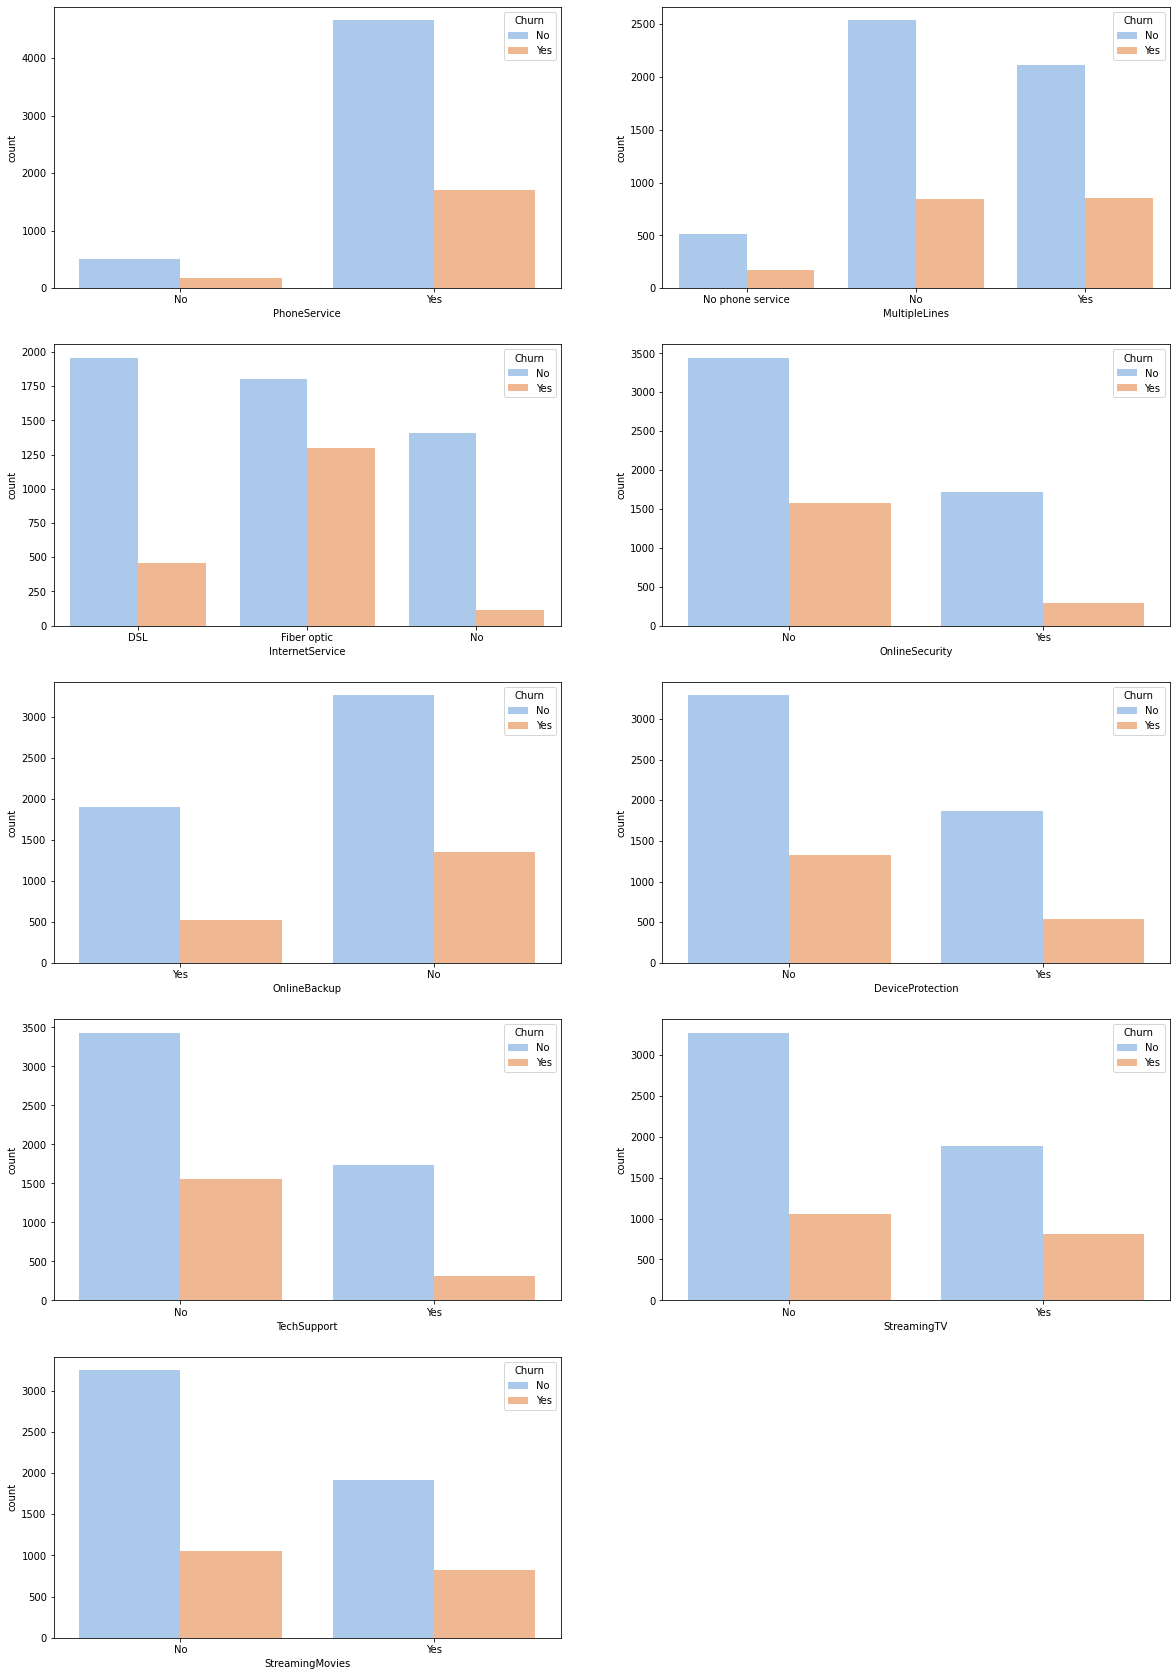

In [28]:
plt.figure(figsize=(20,30))

plotnumber = 1

for column in dfServices.columns.tolist():
    if plotnumber<=9 :
        ax = plt.subplot(5,2,plotnumber)
        sns.countplot(data=df, x=column, hue='Churn', palette = 'pastel')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

# Data Preprocessing

## Features Selection

### Catagorical Features

Dilihat dari EDA diatas dan hasil pengamatan, ada beberapa Kolom yang tidak memengaruhi apakah customers akan Churn atau tidak. Kolom Tersebut adalah :
- CustomersId
- Gender
- Partners

In [29]:
df = df.drop(['customerID', 'gender', 'Partner'], axis=1)

In [30]:
df.head()

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Numerical Features

Untuk data numeric, akan dilakukan pemilihan berdasarkan nilai korelasi dan features importance dari library `Random Forest` dan tetap mempertimbangan penilaian subjektif jika dinilai kolom patut dijadikan feature

In [31]:
#melakukan encoding sederhana untuk label

df['Churn'] = df['Churn'].map({
    'Yes' : 1,
    'No' : 0
})

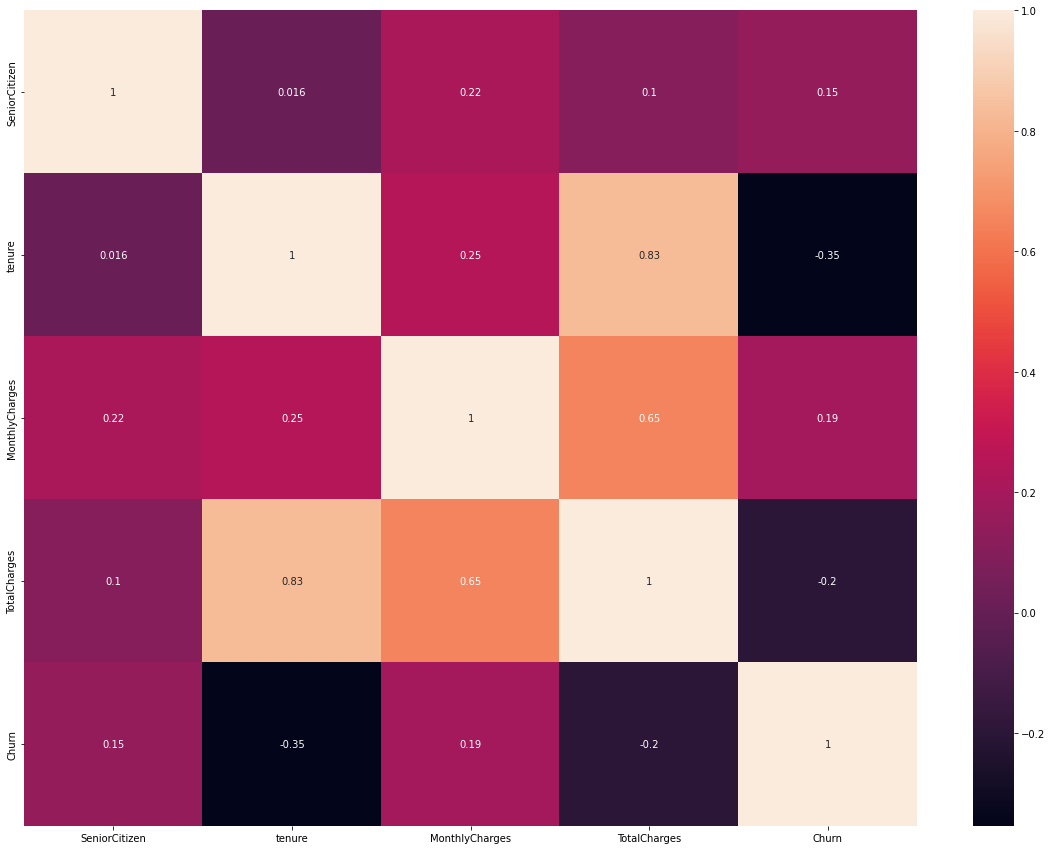

In [32]:
plt.figure(figsize=(20,15))

sns.heatmap(df.corr(), annot=True)
plt.show()

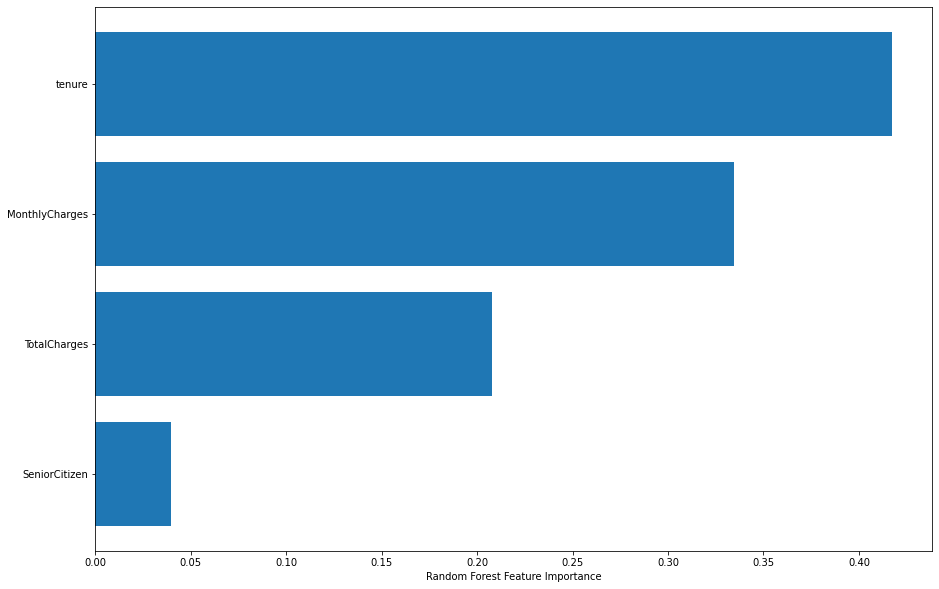

In [33]:
dfCopy = df.copy()

obj_col = df.select_dtypes(include='object').columns.tolist()
num_col = df.select_dtypes(include=np.number).columns.tolist()


x = dfCopy[num_col].drop(('Churn'), axis=1) #pendefinisian features
y = dfCopy['Churn'] #pendefinisian Label

rf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=8) #pendefinisian RandomForest
x_train = rf.fit(x, y) #fit untuk melihat features importance dan ploting

#ploting features importance
plt.figure(figsize=(15,10))

sorted_idx = rf.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()



Dilihat dari nilai Korelasi dan Random Forest features importance, ternyata nilai korelasi sangat rendah terhadap target. Namun menurut penilai secara subjektif yang didukung oleh EDA yang telah dilakukan saya akan memilih semua data numerical.

## Outliers

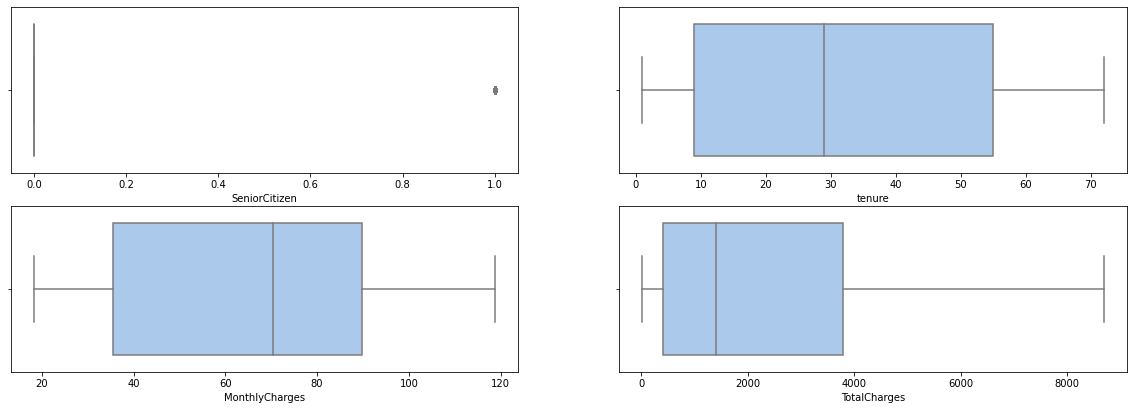

In [34]:
plt.figure(figsize=(20,25))

plotnumber = 1

for column in df[num_col].columns.tolist()[:-1]:
    if plotnumber<=31 :
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(data=df[num_col], x=column, palette='pastel')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Dilihat dari boxplot di atas, tidak ada outlier pada semua data numerical.

## SMOTE for Balancing Data

In [35]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [36]:
y.value_counts() #Target Before Oversampling

0    5163
1    1869
Name: Churn, dtype: int64

In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Dependents        7032 non-null   object 
 2   tenure            7032 non-null   int64  
 3   PhoneService      7032 non-null   object 
 4   MultipleLines     7032 non-null   object 
 5   InternetService   7032 non-null   object 
 6   OnlineSecurity    7032 non-null   object 
 7   OnlineBackup      7032 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          7032 non-null   object 
 13  PaperlessBilling  7032 non-null   object 
 14  PaymentMethod     7032 non-null   object 
 15  MonthlyCharges    7032 non-null   float64
 16  TotalCharges      7032 non-null   float64


In [38]:
cat_ind = [1,3,4,5,6,7,8,9,10,11,12,13,14] #categorical features index

In [39]:
oversamp = SMOTENC(categorical_features=cat_ind, random_state=8)

x1, y1= oversamp.fit_resample(x,y)

In [40]:
print(f'Bentuk dan Total Data setelah dilakukan Over Sample {x1.shape}')

Bentuk dan Total Data setelah dilakukan Over Sample (10326, 17)


In [41]:
y1.value_counts() #Target After Oversampling

1    5163
0    5163
Name: Churn, dtype: int64

## Train Validation Test Split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=8)

In [43]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=8)
print(f'Jumlah Train : {x_train.shape}')
print(f'Jumlah Validation : {x_val.shape}')
print(f'Jumlah Test : {x_test.shape}')
print(f'Jumlah Total data {len(x_train)+len(x_val)+len(x_test)}')

Jumlah Train : (6608, 17)
Jumlah Validation : (1652, 17)
Jumlah Test : (2066, 17)
Jumlah Total data 10326


## Encoding

In [44]:
label_encoder = LabelEncoder()
for i in obj_col:
    x_train[i] = label_encoder.fit_transform(x_train[i])
    x_val[i] = label_encoder.transform(x_val[i]) 
    x_test[i] = label_encoder.transform(x_test[i])

## Scaling

In [45]:
scaler = StandardScaler()
x_train[num_col[1:-1]] = scaler.fit_transform(x_train[num_col[1:-1]])
x_val[num_col[1:-1]] = scaler.transform(x_val[num_col[1:-1]])
x_test[num_col[1:-1]] = scaler.transform(x_test[num_col[1:-1]])

In [46]:
x_train.shape

(6608, 17)

# Pendefinisian Model

## Sequential

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
model_seq = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(17,)),

  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Dense(70, activation='relu'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Dense(1, activation='sigmoid')
])


In [49]:
model_seq.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

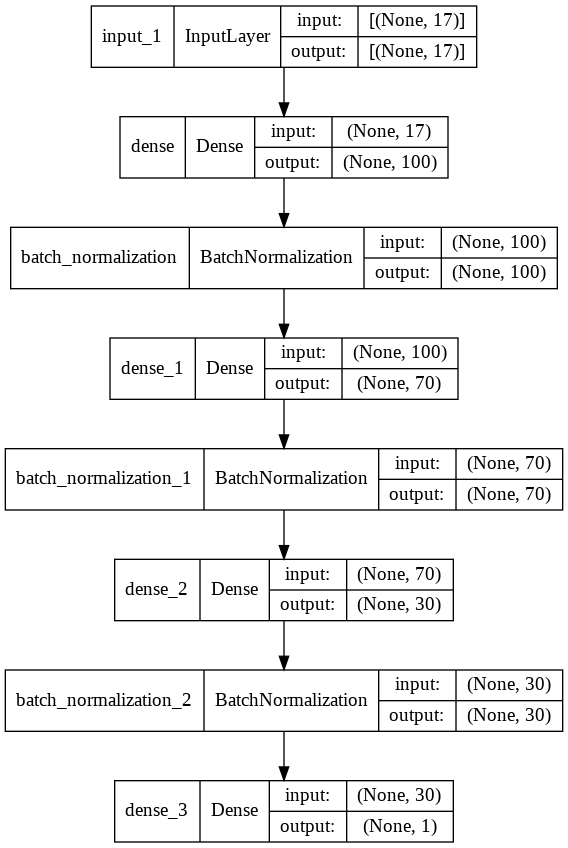

In [50]:
keras.utils.plot_model(model_seq, "Squential_API.png", show_shapes=True)

## Functional

In [51]:
np.random.seed(42) # randomseed for consistency
tf.random.set_seed(42)

In [52]:
inp = keras.layers.Input(shape=(17,))
dense1 = tf.keras.layers.Dense(100, activation='relu')(inp) #make same Neuron as Squential API
dense2 = tf.keras.layers.Dense(70, activation='relu')(dense1)
dense3 = tf.keras.layers.Dense(30, activation='relu')(dense2)
out = tf.keras.layers.Dense(1, activation='sigmoid')(dense3)

In [53]:
model_func = tf.keras.models.Model(inputs=inp, outputs=out) # model definition

In [54]:
model_func.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_4 (Dense)             (None, 100)               1800      
                                                                 
 dense_5 (Dense)             (None, 70)                7070      
                                                                 
 dense_6 (Dense)             (None, 30)                2130      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 11,031
Trainable params: 11,031
Non-trainable params: 0
_________________________________________________________________


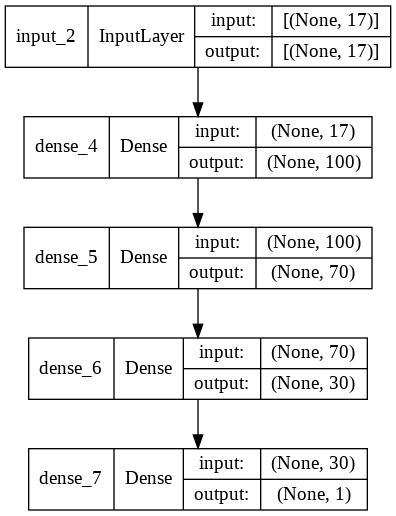

In [56]:
keras.utils.plot_model(model_func, "Functional_API.png", show_shapes=True)

# Training Model

## Sequential

In [57]:
history_seq = model_seq.fit(x_train, y_train,
                    validation_data = (x_val, y_val),
                    epochs=10
)

Epoch 1/10
207/207 [==============================] - 2s 4ms/step - loss: 0.4490 - accuracy: 0.7872 - val_loss: 0.4786 - val_accuracy: 0.7930
Epoch 2/10
207/207 [==============================] - 1s 3ms/step - loss: 0.4141 - accuracy: 0.8090 - val_loss: 0.4070 - val_accuracy: 0.8130
Epoch 3/10
207/207 [==============================] - 1s 3ms/step - loss: 0.4027 - accuracy: 0.8119 - val_loss: 0.3905 - val_accuracy: 0.8245
Epoch 4/10
207/207 [==============================] - 1s 3ms/step - loss: 0.3949 - accuracy: 0.8195 - val_loss: 0.3980 - val_accuracy: 0.8160
Epoch 5/10
207/207 [==============================] - 1s 3ms/step - loss: 0.3848 - accuracy: 0.8190 - val_loss: 0.4058 - val_accuracy: 0.8178
Epoch 6/10
207/207 [==============================] - 1s 3ms/step - loss: 0.3794 - accuracy: 0.8231 - val_loss: 0.3984 - val_accuracy: 0.8238
Epoch 7/10
207/207 [==============================] - 1s 3ms/step - loss: 0.3742 - accuracy: 0.8287 - val_loss: 0.4041 - val_accuracy: 0.8081
Epoch 

## Functional

In [58]:
history_func = model_func.fit(x_train, y_train,
                    validation_data = (x_val, y_val),
                    epochs=10
)

Epoch 1/10
207/207 [==============================] - 2s 3ms/step - loss: 0.4510 - accuracy: 0.7862 - val_loss: 0.4075 - val_accuracy: 0.8063
Epoch 2/10
207/207 [==============================] - 1s 2ms/step - loss: 0.4103 - accuracy: 0.8075 - val_loss: 0.4018 - val_accuracy: 0.8093
Epoch 3/10
207/207 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8139 - val_loss: 0.3896 - val_accuracy: 0.8226
Epoch 4/10
207/207 [==============================] - 1s 2ms/step - loss: 0.3990 - accuracy: 0.8134 - val_loss: 0.3983 - val_accuracy: 0.8202
Epoch 5/10
207/207 [==============================] - 1s 2ms/step - loss: 0.3922 - accuracy: 0.8189 - val_loss: 0.3994 - val_accuracy: 0.8136
Epoch 6/10
207/207 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8199 - val_loss: 0.3909 - val_accuracy: 0.8226
Epoch 7/10
207/207 [==============================] - 1s 2ms/step - loss: 0.3825 - accuracy: 0.8234 - val_loss: 0.3911 - val_accuracy: 0.8251
Epoch 

# Model Evalutaion

## Sequential

### Loss & Accuracu Graph

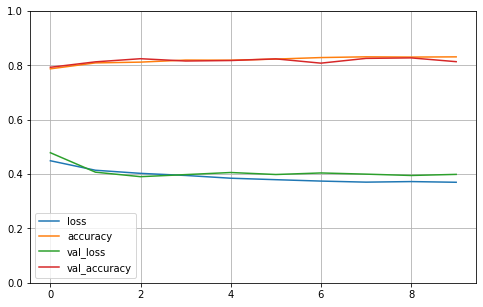

In [59]:
pd.DataFrame(history_seq.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Validation Classification Report

In [60]:
y_pred_seq = (model_seq.predict(x_val) > 0.5).astype("int32") #angka 0.5 adalah threshold jika menggunakan sigmoid function

In [61]:
print(classification_report(y_val, y_pred_seq))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       844
           1       0.78      0.86      0.82       808

    accuracy                           0.81      1652
   macro avg       0.82      0.81      0.81      1652
weighted avg       0.82      0.81      0.81      1652



### Test Classification Report

In [62]:
y_pred_seq = (model_seq.predict(x_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_seq))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1041
           1       0.79      0.85      0.82      1025

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



## Functional

### Loss & Accuracu Graph

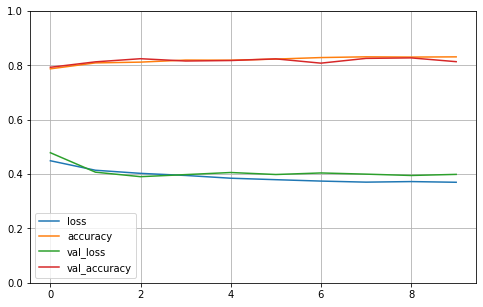

In [63]:
pd.DataFrame(history_seq.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Validation Classification Report

In [64]:
y_pred_func = (model_func.predict(x_val) > 0.5).astype("int32") #angka 0.5 adalah threshold jika menggunakan sigmoid function

In [65]:
print(classification_report(y_val, y_pred_func))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       844
           1       0.78      0.88      0.83       808

    accuracy                           0.82      1652
   macro avg       0.82      0.82      0.82      1652
weighted avg       0.83      0.82      0.82      1652



### Test Classification Report

In [66]:
y_pred_func = (model_func.predict(x_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_func))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1041
           1       0.78      0.85      0.82      1025

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



# Model Improvement

Untuk Melakukan Model Improvement, saya hanya akan melakukan EarlyStopping dan menambahkan Dropout pada Hidden layer untuk mencegah model mengalami overfitting

## Sequential

### Model Defintion

In [67]:
np.random.seed(42) # randomseed for consistency
tf.random.set_seed(42)

In [68]:
model_seq_imp = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(17,)),

  tf.keras.layers.Dense(120, activation='relu'),
  tf.keras.layers.Dropout(rate=0.25),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dropout(rate=0.25),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Dense(70, activation='relu'),
  tf.keras.layers.Dropout(rate=0.25),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dropout(rate=0.25),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Dense(25, activation='relu'),
  tf.keras.layers.Dropout(rate=0.25),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Dense(1, activation='sigmoid')
])


In [69]:
model_seq_imp.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model Training

In [70]:
history_seq_imp = model_seq_imp.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    callbacks=tf.keras.callbacks.EarlyStopping(patience=5, 
                                               restore_best_weights=True),
    epochs=100
)

Epoch 1/100
207/207 [==============================] - 3s 6ms/step - loss: 0.6308 - accuracy: 0.6765 - val_loss: 0.5009 - val_accuracy: 0.7427
Epoch 2/100
207/207 [==============================] - 1s 5ms/step - loss: 0.5081 - accuracy: 0.7613 - val_loss: 0.4355 - val_accuracy: 0.7881
Epoch 3/100
207/207 [==============================] - 1s 5ms/step - loss: 0.4760 - accuracy: 0.7750 - val_loss: 0.4211 - val_accuracy: 0.7972
Epoch 4/100
207/207 [==============================] - 1s 5ms/step - loss: 0.4673 - accuracy: 0.7827 - val_loss: 0.4201 - val_accuracy: 0.7996
Epoch 5/100
207/207 [==============================] - 1s 5ms/step - loss: 0.4511 - accuracy: 0.7916 - val_loss: 0.4075 - val_accuracy: 0.8123
Epoch 6/100
207/207 [==============================] - 1s 5ms/step - loss: 0.4523 - accuracy: 0.7963 - val_loss: 0.4024 - val_accuracy: 0.8178
Epoch 7/100
207/207 [==============================] - 1s 4ms/step - loss: 0.4359 - accuracy: 0.7972 - val_loss: 0.4041 - val_accuracy: 0.8142

In [71]:
model_seq_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 120)               2160      
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 120)              480       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 100)               12100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 100)              400       
 hNormalization)                                      

### Model Evaluation

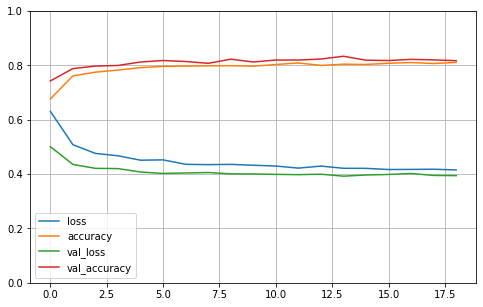

In [72]:
pd.DataFrame(history_seq_imp.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Setelah dilakukan Model Improvement, model menghasilkan nilai akurasi yang cenderung lebih stabil dan hampir sama antara training dan validation data

In [73]:
# validation classification report

y_pred_seq_imp = (model_seq_imp.predict(x_val) > 0.5).astype("int32")

print(classification_report(y_val, y_pred_seq_imp))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       844
           1       0.81      0.86      0.83       808

    accuracy                           0.83      1652
   macro avg       0.83      0.83      0.83      1652
weighted avg       0.83      0.83      0.83      1652



In [74]:
# Test Classification report

y_pred_seq_imp = (model_seq_imp.predict(x_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_seq_imp))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1041
           1       0.80      0.81      0.81      1025

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



## Functional

### Model Definition

In [75]:
inp = keras.layers.Input(shape=(17,))
dense1 = tf.keras.layers.Dense(120, activation='relu')(inp) #make same Neuron as Squential API
dense1 = tf.keras.layers.Dropout(rate=0.25)(dense1)
dense1 = tf.keras.layers.BatchNormalization()(dense1)

dense2 = tf.keras.layers.Dense(100, activation='relu')(dense1)
dense2 = tf.keras.layers.Dropout(rate=0.25)(dense2)
dense2 = tf.keras.layers.BatchNormalization()(dense2)

dense3 = tf.keras.layers.Dense(70, activation='relu')(dense2)
dense3 = tf.keras.layers.Dropout(rate=0.25)(dense3)
dense3 = tf.keras.layers.BatchNormalization()(dense3)

dense4 = tf.keras.layers.Dense(50, activation='relu')(dense3)
dense4 = tf.keras.layers.Dropout(rate=0.25)(dense4)
dense4 = tf.keras.layers.BatchNormalization()(dense4)

dense5 = tf.keras.layers.Dense(25, activation='relu')(dense4)
dense5 = tf.keras.layers.Dropout(rate=0.25)(dense5)
dense5 = tf.keras.layers.BatchNormalization()(dense5)

out = tf.keras.layers.Dense(1, activation='sigmoid')(dense5)

model_func_imp = tf.keras.models.Model(inputs=inp, outputs=out)

model_func_imp.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy']
)

### Model Training

In [76]:
history_func_imp = model_func_imp.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    callbacks=tf.keras.callbacks.EarlyStopping(patience=5, 
                                               restore_best_weights=True),
    epochs=100
)

Epoch 1/100
207/207 [==============================] - 3s 6ms/step - loss: 0.6153 - accuracy: 0.6852 - val_loss: 0.5141 - val_accuracy: 0.7512
Epoch 2/100
207/207 [==============================] - 1s 5ms/step - loss: 0.5097 - accuracy: 0.7606 - val_loss: 0.4395 - val_accuracy: 0.7857
Epoch 3/100
207/207 [==============================] - 1s 5ms/step - loss: 0.4811 - accuracy: 0.7765 - val_loss: 0.4233 - val_accuracy: 0.7936
Epoch 4/100
207/207 [==============================] - 1s 5ms/step - loss: 0.4637 - accuracy: 0.7833 - val_loss: 0.4215 - val_accuracy: 0.7954
Epoch 5/100
207/207 [==============================] - 1s 5ms/step - loss: 0.4555 - accuracy: 0.7850 - val_loss: 0.4081 - val_accuracy: 0.8117
Epoch 6/100
207/207 [==============================] - 1s 5ms/step - loss: 0.4477 - accuracy: 0.7959 - val_loss: 0.4019 - val_accuracy: 0.8123
Epoch 7/100
207/207 [==============================] - 1s 5ms/step - loss: 0.4385 - accuracy: 0.7986 - val_loss: 0.4034 - val_accuracy: 0.8130

### Model Evaluation

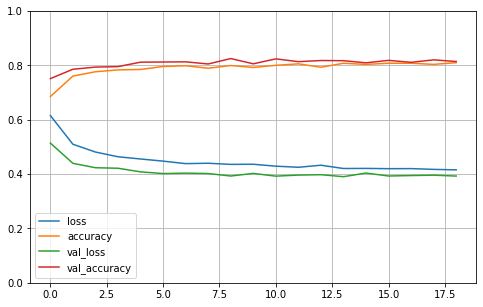

In [77]:
pd.DataFrame(history_func_imp.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [78]:
# Validation Classification Report

y_pred_func_imp = (model_func_imp.predict(x_val) > 0.5).astype("int32")

print(classification_report(y_val, y_pred_func_imp))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       844
           1       0.80      0.84      0.82       808

    accuracy                           0.82      1652
   macro avg       0.82      0.82      0.82      1652
weighted avg       0.82      0.82      0.82      1652



In [79]:
# Test Classification Report

y_pred_func_imp = (model_func_imp.predict(x_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_func_imp))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1041
           1       0.80      0.80      0.80      1025

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



# Model Saving

In [80]:
model_seq_imp.save("my_model.h5")

# Model Inference

## Making New Data

In [81]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Dependents        7032 non-null   object 
 2   tenure            7032 non-null   int64  
 3   PhoneService      7032 non-null   object 
 4   MultipleLines     7032 non-null   object 
 5   InternetService   7032 non-null   object 
 6   OnlineSecurity    7032 non-null   object 
 7   OnlineBackup      7032 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          7032 non-null   object 
 13  PaperlessBilling  7032 non-null   object 
 14  PaymentMethod     7032 non-null   object 
 15  MonthlyCharges    7032 non-null   float64
 16  TotalCharges      7032 non-null   float64


In [82]:
xNew = [[
        0, #seniorCitizen
        'No', #Dependents
        12, #tenur
        'Yes', #PhoneService
        'Yes', #MultipleLines
        'Fiber optic', #InternetService
        'No', #OnlineSecurity
        'No', #OnlineBackup
        'Yes', #DeviceProtection
        'No', #TechSupport
        'Yes', #StreamingTV
        'Yes', # StreamingMovies
        'One year', #Contract
        'Yes', #PaperlessBilling
        'Bank transfer (automatic)', #PaymentMethod
        89.00, #MontylyCharges
        1100.00 #TotalCharges
]]

xNew = pd.DataFrame(xNew, columns=x.columns) #change into Pandas Dataframe with x columns

xNew

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),89.0,1100.0


## Encode

In [83]:
label_encoder = LabelEncoder()
for i in obj_col:
    xNew[i] = label_encoder.fit_transform(xNew[i])


## Scaling

In [84]:
scaler = StandardScaler()
xNew[num_col[1:-1]] = scaler.fit_transform(xNew[num_col[1:-1]])

## Prediction

In [85]:
new_predict = (model_func_imp.predict(xNew) > 0.5).astype("int32")

if 1 in new_predict:
  print('Data User Input kemungkinan besar akan Churn')
else : print('Data User Input Kemungkinan besar Tidak Churn')

Data User Input kemungkinan besar akan Churn


# Kesimpulan

## EDA Analysis

Dari EDA analisis ada beberapa hal penting yang dapat diambil yaiut :
- Dataset memiliki `Imbalance Target`, yang selanjutkan saat data preprocessing saya lakukan `OverSampling`.
- hanya Features Gender secara penilaian subjektif tidak ada kaitannya dengan target, selainnya patut menjadi pertimbangan untuk ditelusuri lebih lanjut dan dijadikan features.
- Pada kolom Services, ada beberapa kolom yang mengandung `No Internet Service`, ini saya indikasikan adalah `Missing Values` dan dengan referensi data baru yang di upload oleh IBM, saya mengganti `No Internet Service` dengan `No` secara keseluruhan

## Model Analysis

Model ANN yang saya buat awalnya hanya mengandung `3 Hidden Layers` dan `10 Epochs`, hal ini sangat mungkin terjadi overfitting pada model. Hal ini terbukti saat saya melakukan Model Improvement dengan cara menambahkan `Drop Out` dengan rate 0.25 dan `Early Stopping` dengan patience = 5.

Setelah dilakukan Model Improvement, hasil nilai akurasi dan F1 Score memang tidak naik secara signifikan, namun model dapat dengan baik memprediksi hasil train, validation, dan test. Dengan meminimalisir Overfit ini berarti jika kita masukan Nilai baru berkemungkinan besar model akan memprediksi hal yang benar juga